#今回の目的#
特徴量から、その人の腫瘍が良性か悪性かを判断します。

target = 0　　　悪性

target = 1　　　良性

#使用するデータ#
breast_cancer.csv

#腫瘍とは？#

「がんがみえる（第１版）」（医療情報科学研究所）より。

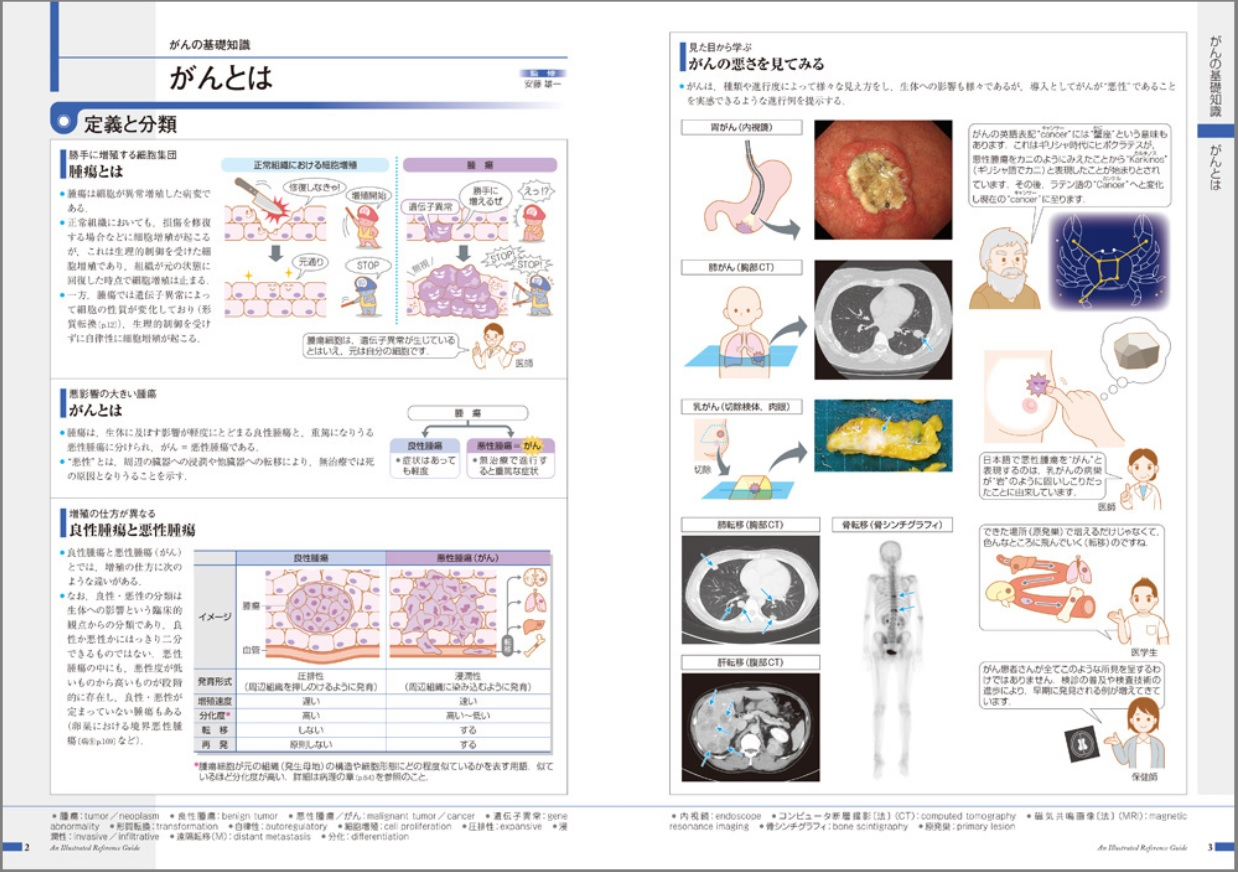

In [ ]:
# モジュールの読み込み
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mkdir data

In [ ]:
cd /content/data

/content/data


In [ ]:
# 1.csvファイルの読み込み
df = pd.read_csv('breast_cancer.csv')
# 2.カテゴリカルデータ(文字列などのデータ)の確認
# 確認する→ダミー変数化の処理は無し
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 4-2-1.外れ値の処理は無し(決定木では、外れ値の影響を受けないため。)→テキストP.437
# 4-2-3.データの標準化処理も決定木分析では影響無し→テキストP.438

# 4-1.欠損値の確認
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
# 4-2-5.特徴量として利用する列のリスト
# col = ['worst radius', 'worst texture', 'worst perimeter', 'worst area']

# 特徴量抜き出し
# 全ての行とmean radius列～worst fractal dimension列
x = df.loc[:,'mean radius':'worst fractal dimension']
t = df['target'] # 正解データ抜き出し

## <B>*(1)ランダムフォレスト*</B>

In [ ]:
# ◆◆ランダムフォレスト◆◆のインポート
from sklearn.ensemble import RandomForestClassifier

# 3.訓練データとテストデータの分離　⇒　ホールドアウト法
x_train, x_test, y_train, y_test=train_test_split(x, t,
 test_size = 0.2, random_state = 0)

# 作成する木の数を、200に設定。
model = RandomForestClassifier(n_estimators = 200,
random_state = 0)

In [ ]:
# 6.モデルの学習
model.fit(x_train, y_train)

# 7.正解率の表示
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.9649122807017544


## <B>*(2)単純な決定木*</B>

In [ ]:
# 5.学習モデルの選択
# ◆◆単純な決定木◆◆と比較
from sklearn import tree
model2 = tree.DecisionTreeClassifier(random_state = 0)
model2.fit(x_train, y_train)

# 7.正解率の表示　→　過学習が起きているので、却下。
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

1.0
0.9122807017543859


# 過学習とは？？　(テキストp.252より。)
- 教師あり学習において、複雑なモデルで学習すればするほど学習に利用した訓練データでの予測性能が上がりますが、一方でテストデータでの予測性能は低くなるという現象
- モデルを必要以上に複雑にすると、訓練データのとても細かい(必要以上の)特徴までも法則として学習してしまうのが要因
- 決定木分析では、<B>木の深さ</B>を増やしすぎると過学習を起こしやすくなる
- ランダムフォレストでは、さまざまな予測モデルを作成して、最終的に1つの予測結果を出す手法である<B>アンサンブル学習</B>を用いているため、決定木に比べ、<B>過学習を防ぐ</B>ことができる

# モデルのチューニングその１(特徴量重要度)

In [ ]:
# 4-2-2.特徴量の絞り込み(値が1に近い項目を採用)
importance = model.feature_importances_ # 特徴量重要度

# 列との対応がわかりやすいようにシリーズ変換
# 特徴量重要度で、ソート
pd.Series(importance, index = x_train.columns).sort_values()

mean fractal dimension     0.003410
compactness error          0.003859
smoothness error           0.004586
concavity error            0.004783
concave points error       0.004864
mean symmetry              0.005210
texture error              0.005293
symmetry error             0.005533
mean smoothness            0.005593
fractal dimension error    0.006219
worst fractal dimension    0.008336
worst smoothness           0.009756
worst symmetry             0.009927
mean compactness           0.010130
perimeter error            0.013465
worst compactness          0.015082
mean texture               0.017181
radius error               0.017454
worst texture              0.019443
worst concavity            0.029306
mean radius                0.030772
mean area                  0.032945
area error                 0.036094
mean perimeter             0.051806
mean concavity             0.071880
worst area                 0.096976
mean concave points        0.099884
worst radius               0

# 特徴量の決定(暫定)
- <span style="color: blue">worst concave points</span>　　0.149786
- <span style="color: blue">worst perimeter</span>　　　　 0.120873
- <span style="color: blue">worst radius</span>　　　　　　0.109557
- <span style="color: blue">mean concave points</span>　　 0.099884
- <span style="color: blue">worst area</span>　　　　　　　0.096976
- <span style="color: blue">mean concavity</span>　　　　　0.071880
- <span style="color: blue">mean perimeter</span>　　　　　0.051806

## <B>*(3)ランダムフォレスト(特徴量重要度の上位7項目のみ)*</B>

In [ ]:
# 特徴量抜き出し
# 全ての行とmean radius列～worst fractal dimension列
# x = df.loc[:,'mean radius':'worst fractal dimension']

# 7項目に限定。
col = ['worst concave points', 'worst perimeter', 'worst radius', 'mean concave points', 'worst area', 'mean concavity', 'mean perimeter']
x = df.loc[:,col]
t = df['target'] # 正解データ抜き出し

# ◆◆ランダムフォレスト◆◆のインポート
from sklearn.ensemble import RandomForestClassifier

# 3.訓練データとテストデータの分離　⇒　ホールドアウト法
x_train, x_test, y_train, y_test=train_test_split(x, t,
 test_size = 0.2, random_state = 0)

# 作成する木の数を、200に設定。
model = RandomForestClassifier(n_estimators = 200,
random_state = 0)

# 6.モデルの学習
model.fit(x_train, y_train)

# 7.正解率の表示
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.956140350877193


# モデルのチューニングその2(多項式特徴量)

In [ ]:
# 4-2-4.多項式特徴量を手動で追加
# RM2乗のシリーズを新しい列として追加
x['worst concave points 2'] = x['worst concave points'] ** 2
x.head(2)

# 4-2-4.交互作用特徴量を追加
x['worst con po * worst peri'] = x['worst concave points'] * x['worst perimeter']
x.head(2)

,worst concave points,worst perimeter,worst radius,mean concave points,worst area,mean concavity,mean perimeter,worst concave points 2,worst con po * worst peri
0,0.2654,184.6,25.38,0.14710,2019.0,0.3001,122.8,0.070437,48.99284
1,0.1860,158.8,24.99,0.07017,1956.0,0.0869,132.9,0.034596,29.53680


## <B>*(4)ランダムフォレスト(多項式特徴量を追加バージョン)*</B>

In [ ]:
# 特徴量抜き出し
# 全ての行とmean radius列～worst fractal dimension列
x = df.loc[:,'mean radius':'worst fractal dimension']
# 7項目にしても、正解率は変わらなかったため、却下。
# col = ['worst concave points', 'worst perimeter', 'worst radius', 'mean concave points', 'worst area', 'mean concavity', 'mean perimeter']
# x = df.loc[:,col]
t = df['target'] # 正解データ抜き出し

# 4-2-4.多項式特徴量を追加
# RM2乗のシリーズを新しい列として追加
x['worst concave points 2'] = x['worst concave points'] ** 2
x.head(2)

# 4-2-4.交互作用特徴量を追加
x['worst con po * worst peri'] = x['worst concave points'] * x['worst perimeter']
x.head(2)

# 未知のデータで予測する際に使用するため、データフレームをコピーしておく
future = x

# ◆◆ランダムフォレスト◆◆のインポート
from sklearn.ensemble import RandomForestClassifier

# 3.訓練データとテストデータの分離　⇒　ホールドアウト法
x_train, x_test, y_train, y_test=train_test_split(x, t,
 test_size = 0.2, random_state = 0)

# 作成する木の数を、200に設定。
model = RandomForestClassifier(n_estimators = 200,
random_state = 0)

# 6.モデルの学習
model.fit(x_train, y_train)

# 7.正解率の表示
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.9824561403508771


# モデルのチューニング結果
- 特徴量を7項目だけにしても正解率は改善されず。
- 特徴量エンジニアリング(多項式特徴量や交互作用特徴量など)を追加した場合のみ正解率が上がったため、この辺りでモデルのチューニングを終了とします。

# 各計算モデルと正解率の結果
1. 単純な決定木　　0.9122807017543859
2. ランダムフォレスト　　0.9649122807017544
3. ランダムフォレスト(特徴量重要度の上位7項目のみ)　　0.956140350877193
4. <span style="color: lime">ランダムフォレスト(多項式特徴量を追加バージョン)　　0.9824561403508771</span>

# 未知のデータで予測

In [ ]:
# 3行表示し、列数を確認　⇒　行(rows) × 列(columns)
print(x_train[:3])

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
338        10.05         17.53           64.41      310.8          0.10070   
427        10.80         21.98           68.79      359.9          0.08801   
406        16.14         14.86          104.30      800.0          0.09495   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
338           0.07326         0.02511              0.01775         0.1890   
427           0.05743         0.03614              0.01404         0.2016   
406           0.08501         0.05500              0.04528         0.1735   

     mean fractal dimension  ...  worst perimeter  worst area  \
338                 0.06331  ...            71.98       384.0   
427                 0.05977  ...            83.69       489.5   
406                 0.05875  ...           115.90       947.9   

     worst smoothness  worst compactness  worst concavity  \
338            0.1402             0.1402           0.105

In [ ]:
# target = 1 となっている、breast_cancer.csvの21行目を借用。
dff = future.loc[19,'mean radius':'worst con po * worst peri']
print(dff.astype(int))

# floatをintに変換することで未知のデータとして使用。predictより、悪性か良性かを予測する。
model.predict([dff.astype(int)])

mean radius                   13
mean texture                  14
mean perimeter                87
mean area                    566
mean smoothness                0
mean compactness               0
mean concavity                 0
mean concave points            0
mean symmetry                  0
mean fractal dimension         0
radius error                   0
texture error                  0
perimeter error                2
area error                    23
smoothness error               0
compactness error              0
concavity error                0
concave points error           0
symmetry error                 0
fractal dimension error        0
worst radius                  15
worst texture                 19
worst perimeter               99
worst area                   711
worst smoothness               0
worst compactness              0
worst concavity                0
worst concave points           0
worst symmetry                 0
worst fractal dimension        0
worst conc

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

Colaboratoryではなぜか、以下のエラーメッセージが表示される。

「/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
array([1])」

ただし、以下のサイトによるとPythonのバージョンとscikit-learnの組み合わせによって、発生するバグとのこと。

new bug in V1.0 new added attribute 'feature_names_in' · Issue #21577 · scikit-learn/scikit-learn · GitHub

https://github.com/scikit-learn/scikit-learn/issues/21577

[Pythonのバージョン]

コマンドプロンプト　⇒　3.9.7

Anaconda Prompt　⇒　3.7.4

とりあえず、Jupyter Notebookでは正常に動作していたため、
OKとしています。

↓↓↓↓↓


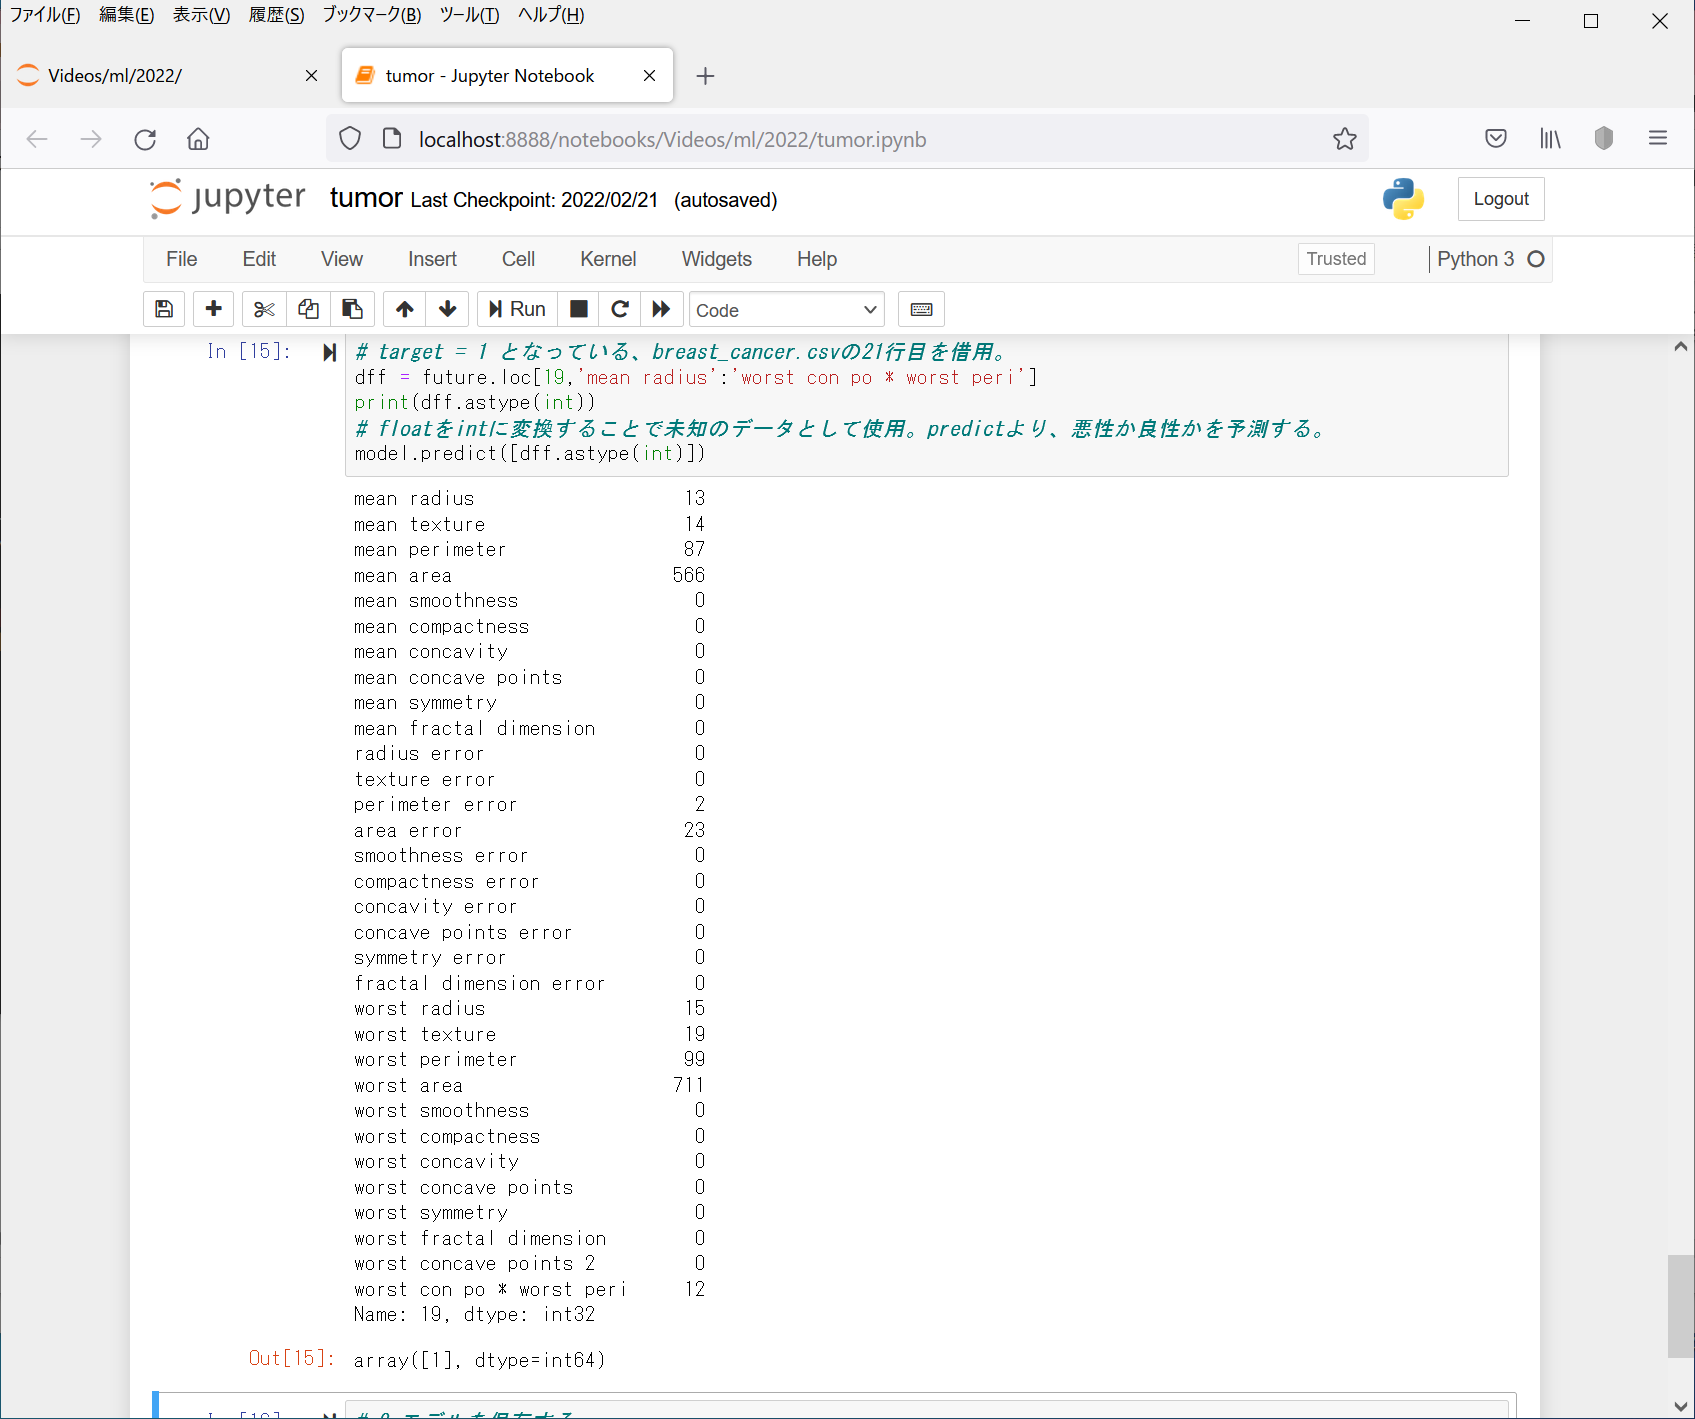

In [ ]:
#@title デフォルトのタイトル テキスト
# 8.モデルを保存する
import pickle

with open('tumor.pkl', 'wb') as f:
    pickle.dump(model, f)